<div class="alert alert-block alert-success">
     
# IC PCDA CAPSTONE - HARRY BAKHSHI - NOTEBOOK 4 - VARIABLE SEASONAL DECOMPOSITION
     
</div>

MIT License for code used from https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python in notebook:   
https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python?tab=MIT-1-ov-file     

(Accessed 06/06/2024)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.io as pio
pio.templates.default = "plotly_white"
import pandas as pd
import pickle

In [2]:
#!pip install kaleido
#!pip install matrixprofile-ts

# Find variable seasons for imputation:

## Set up function for formatting plots:

Load timeseries:

In [3]:
#timeseries:
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/janatahack_demand_forecasting_data_ts_df.pik'
# with open(file, 'wb') as f:
#     pickle.dump(ts_df, f) #write df to .pik file on disk
with open(file, 'rb') as f:
     ts_df = pickle.load(f) #load pickle file 'file' into variable
import pandas.api.types as ptypes
ptypes.is_datetime64_dtype(ts_df['timestamp'])
#^https://stackoverflow.com/questions/25043620/correct-way-to-check-if-pandas-dataframe-index-is-a-certain-type-datetimeindex
#Accessed 06/06/2024
ts_df_2 = ts_df.copy()
ts_df_orig = ts_df
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 141 entries, timestamp to 545621percent_display
dtypes: datetime64[ns](1), float64(140)
memory usage: 143.3 KB


In [4]:
ts_df.tail(60)

,timestamp,679023median_total_price,245338median_total_price,222087median_total_price,223153median_total_price,223245median_total_price,222765median_total_price,547934median_total_price,378934median_total_price,219029median_total_price,...,398721percent_display,217217percent_display,217777percent_display,219844percent_display,600934percent_display,673209percent_display,327492percent_display,300291percent_display,546789percent_display,545621percent_display
70,2012-05-22,213.0375,469.53750,168.15000,140.36250,139.6500,234.4125,177.4125,205.9125,312.7875,...,0.000000,0.038462,0.05,0.035714,0.142857,0.0,0.5,0.555556,0.000000,0.0
71,2012-05-29,213.0375,469.53750,185.96250,212.32500,203.0625,234.4125,177.4125,205.9125,312.7875,...,0.000000,0.038462,0.05,0.035714,0.000000,0.5,0.0,0.222222,0.000000,0.0
72,2012-06-02,177.4125,469.53750,233.70000,213.03750,222.3000,234.4125,160.3125,205.9125,312.7875,...,0.055556,0.076923,0.15,0.142857,0.000000,0.0,0.0,0.000000,0.428571,1.0
73,2012-06-03,213.0375,469.53750,167.08125,178.12500,176.7000,178.8375,156.0375,205.9125,312.7875,...,0.055556,0.038462,0.10,0.071429,0.428571,0.0,0.0,0.000000,0.000000,0.0
74,2012-06-11,213.0375,469.53750,213.03750,220.16250,227.2875,179.5500,177.4125,205.9125,312.7875,...,0.111111,0.038462,0.05,0.035714,0.857143,0.0,0.0,0.000000,0.000000,0.0
75,2012-06-19,178.1250,356.96250,211.96875,178.83750,178.8375,178.8375,177.4125,205.9125,312.7875,...,0.555556,0.038462,0.05,0.035714,0.000000,0.5,0.0,0.111111,0.142857,0.0
76,2012-06-26,178.1250,355.53750,215.53125,178.12500,178.1250,178.8375,177.4125,205.9125,312.7875,...,0.722222,0.000000,0.05,0.035714,0.000000,0.0,0.0,0.000000,0.285714,0.0
77,2012-07-08,177.4125,469.53750,234.41250,213.03750,213.0375,227.2875,177.4125,205.9125,173.1375,...,0.055556,0.038462,0.05,0.035714,0.000000,0.0,0.0,0.000000,0.285714,0.0
78,2012-07-17,213.0375,344.85000,216.24375,213.03750,143.2125,145.3500,156.0375,205.9125,289.9875,...,0.666667,0.038462,0.05,0.035714,0.000000,0.0,0.0,0.000000,0.000000,0.0
79,2012-07-24,177.4125,469.53750,213.75000,213.03750,205.9125,227.2875,156.0375,205.9125,312.7875,...,0.111111,0.038462,0.05,0.035714,0.000000,0.0,0.0,0.000000,0.285714,0.0


Create function for formatting plotly plots:

In [5]:
#For formatting plots:
def format_plot(fig, legends = None, xlabel="Time", ylabel="Value", figsize=(500,900), font_size=15, title_font_size=20):
    if legends:
        names = cycle(legends)
        fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_layout(
            autosize=False,
            width=figsize[1],
            height=figsize[0],
            title={
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
            titlefont={
                "size": 20
            },
            legend_title = None,
            legend=dict(
                font=dict(size=font_size),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                title_text=ylabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            ),
            xaxis=dict(
                title_text=xlabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            )
        )
    return fig

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Create seasonality terms:

In [6]:
#Create seasonality terms:
ts_df = ts_df.set_index("timestamp")
ts_df["weekday_name"] = ts_df.index.day_name()
ts_df["weekday"] = ts_df.index.weekday
ts_df["week"] = ts_df.index.isocalendar().week
ts_df["day"] = ts_df.index.day
ts_df["date"] = ts_df.index.date
ts_df["month"] = ts_df.index.month
ts_df["month_name"] = ts_df.index.month_name()
ts_df["year"] = ts_df.index.year
#Making ordered categoricals to make for sorted plots
ts_df['month_name'] = pd.Categorical(ts_df['month_name'], categories=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], ordered=True)
ts_df['weekday_name'] = pd.Categorical(ts_df['weekday_name'], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
ts_df.head(60)
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

,679023median_total_price,245338median_total_price,222087median_total_price,223153median_total_price,223245median_total_price,222765median_total_price,547934median_total_price,378934median_total_price,219029median_total_price,216418median_total_price,...,546789percent_display,545621percent_display,weekday_name,weekday,week,day,date,month,month_name,year
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-01-08,180.2625,469.53750,226.93125,213.03750,205.2000,195.2250,177.4125,205.9125,312.7875,87.63750,...,0.571429,0.0,Saturday,5,1,8,2011-01-08,1,January,2011
2011-01-17,178.1250,426.78750,196.65000,190.23750,205.9125,240.8250,177.4125,177.4125,312.0750,93.33750,...,0.000000,0.0,Monday,0,3,17,2011-01-17,1,January,2011
2011-01-24,178.1250,426.78750,190.23750,190.23750,213.0375,240.8250,177.4125,177.4125,312.7875,85.50000,...,0.142857,0.0,Monday,0,4,24,2011-01-24,1,January,2011
2011-01-31,178.1250,448.16250,226.93125,212.32500,213.0375,240.8250,177.4125,177.4125,312.7875,84.07500,...,0.000000,0.0,Monday,0,5,31,2011-01-31,1,January,2011
2011-02-05,205.9125,469.53750,227.28750,213.03750,213.0375,234.4125,142.5000,177.4125,312.7875,87.63750,...,0.285714,0.0,Saturday,5,5,5,2011-02-05,2,February,2011
2011-02-14,205.9125,453.15000,122.55000,213.03750,180.9750,240.8250,177.4125,177.4125,178.1250,96.18750,...,0.142857,0.0,Monday,0,7,14,2011-02-14,2,February,2011
2011-02-21,205.9125,455.28750,114.00000,213.03750,175.9875,240.8250,177.4125,177.4125,179.5500,96.90000,...,0.142857,0.0,Monday,0,8,21,2011-02-21,2,February,2011
2011-02-28,205.9125,455.28750,149.62500,213.03750,183.8250,219.4500,177.4125,177.4125,312.7875,96.54375,...,0.142857,0.0,Monday,0,9,28,2011-02-28,2,February,2011
2011-03-10,178.1250,318.84375,211.61250,227.28750,208.7625,234.4125,177.4125,205.9125,312.7875,86.21250,...,0.000000,0.0,Thursday,3,10,10,2011-03-10,3,March,2011


In [7]:
ts_df['245387percent_featured']

timestamp
2011-01-08    0.000000
2011-01-17    1.000000
2011-01-24    1.000000
2011-01-31    0.000000
2011-02-05    0.000000
                ...   
2013-09-04    0.511628
2013-09-07    1.000000
2013-11-06    1.000000
2013-12-02    1.000000
2013-12-03    1.000000
Name: 245387percent_featured, Length: 130, dtype: float64

Import libraries for multi-seasonal decomposition:

In [8]:
#Import libraries for multi-seasonal decomposition:
from statsmodels.tsa.seasonal import seasonal_decompose
from src.decomposition.seasonal import STL, FourierDecomposition, MultiSeasonalDecomposition

In [9]:
col_list = list(ts_df.columns.values[:140])
print(col_list)

['679023median_total_price', '245338median_total_price', '222087median_total_price', '223153median_total_price', '223245median_total_price', '222765median_total_price', '547934median_total_price', '378934median_total_price', '219029median_total_price', '216418median_total_price', '219009median_total_price', '217390median_total_price', '216233median_total_price', '216425median_total_price', '320485median_total_price', '300021median_total_price', '245387median_total_price', '216419median_total_price', '398721median_total_price', '217217median_total_price', '217777median_total_price', '219844median_total_price', '600934median_total_price', '673209median_total_price', '327492median_total_price', '300291median_total_price', '546789median_total_price', '545621median_total_price', '679023median_base_price', '245338median_base_price', '222087median_base_price', '223153median_base_price', '223245median_base_price', '222765median_base_price', '547934median_base_price', '378934median_base_price',

Can create series for each variable:

In [10]:
# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)
for var in range(len(col_list)):
    globals()[("ts_" + str(col_list[var]))] = ts_df[col_list[var]]
#^https://stackoverflow.com/questions/19300174/how-to-assign-each-element-of-a-list-to-a-separate-variable
#Accessed 11/06/2024

In [11]:
ts_679023median_total_price

timestamp
2011-01-08    180.2625
2011-01-17    178.1250
2011-01-24    178.1250
2011-01-31    178.1250
2011-02-05    205.9125
                ...   
2013-09-04    213.0375
2013-09-07    234.4125
2013-11-06    234.4125
2013-12-02    177.4125
2013-12-03    177.4125
Name: 679023median_total_price, Length: 130, dtype: float64

In [12]:
ts_545621percent_display

timestamp
2011-01-08    0.0
2011-01-17    0.0
2011-01-24    0.0
2011-01-31    0.0
2011-02-05    0.0
             ... 
2013-09-04    0.0
2013-09-07    0.0
2013-11-06    0.0
2013-12-02    0.0
2013-12-03    0.0
Name: 545621percent_display, Length: 130, dtype: float64

# VARIABLE MULTI-SEASONAL DECOMPOSITION USING FOURIER DECOMPOSITION

* Use Fourier terms over STL method because this is "robust to outliers" when "doing regularized regression using the Fourier terms on the signal", "decoupling the resolution of the data and the expected seasonality".     

^Source: Modern Time Series Forecasting with Python (Manu Joseph, 2022)


Plot multi-seasonal decomposition using Fourier Decomposition as a seasonal model:

Make custom seasonality term using "month" and "week_of_month" (poor seasonality with "year" also included):

In [13]:
#Making custom seasonality term
ts_df["week_of_month"] = pd.Series(np.zeros(len(ts_df)), index=ts_df.index)
from math import ceil
def get_week_of_month(date):
   first_day = date.replace(day=1)

   day_of_month = date.day

   if(first_day.weekday() == 6):
       adjusted_dom = day_of_month + ((1 + first_day.weekday()) / 7)
   else:
       adjusted_dom = day_of_month + first_day.weekday()

   return int(ceil(adjusted_dom/7.0))
#^https://stackoverflow.com/questions/3806473/week-number-of-the-month/26662038#26662038
#Accessed 10/06/2024
for row in range(len(ts_df_2)):
    ts_df["week_of_month"][row] = get_week_of_month(ts_df_2['timestamp'][row])
#Creating a sorted unique combination df
map_df = ts_df[["month", "week_of_month"]].drop_duplicates().sort_values(["month", "week_of_month"])
# Assigning an ordinal variable to capture the order
map_df["map"] = np.arange(1, len(map_df)+1)
# mapping the oprdinal mapping back to the original df and getting the seasonality array
seasonality = ts_df.merge(map_df, on=["month", "week_of_month"], how='left', validate="many_to_one")['map']
seasonality = seasonality.to_numpy(seasonality)
seasonality
# #^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/02-Decomposing%20Time%20Series.ipynb
# #Accessed 06/06/2024

/tmp/ipykernel_4422/1785069018.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df["week_of_month"][row] = get_week_of_month(ts_df_2['timestamp'][row])
/tmp/ipykernel_4422/1785069018.py:18: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ts_df["week_of_month"][row] = get_week_of_month(ts_df_2['timestamp'][row])


array([ 2,  4,  5,  6,  7,  9, 10, 11, 13, 14, 15, 16, 18, 18, 20, 21, 23,
       23, 24, 25, 26, 28, 29, 30, 31, 32, 32, 34, 35, 36, 38, 39, 40, 41,
       43, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61,  1,
        3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 18, 19, 20,
       22, 24, 25, 26, 27, 27, 29, 30, 31, 33, 34, 35, 36, 37, 39, 40, 41,
       42, 44, 45, 46, 47, 47, 48, 49, 50, 53, 54, 54, 55, 56, 58, 60, 61,
        1,  3,  4,  5,  8,  8, 10, 11, 15, 16, 17, 19, 20, 21, 22, 22, 24,
       25, 26, 30, 31, 32, 37, 42, 43, 53, 57, 57])

## Fitting the decomposition object for all variables

***Ran for each variable in col_list (list of the variables)***

In [14]:
seasonal_period_list = []

In [15]:
round((32/(900))*130) #size of sub-sequences to compare for conserved features in time - github example used 32 for sequence of 
#approx. length 900 = 32/900

5

Plot multi-seasonal decomposition using Fourier Decomposition as a seasonal model - one variable as an example:

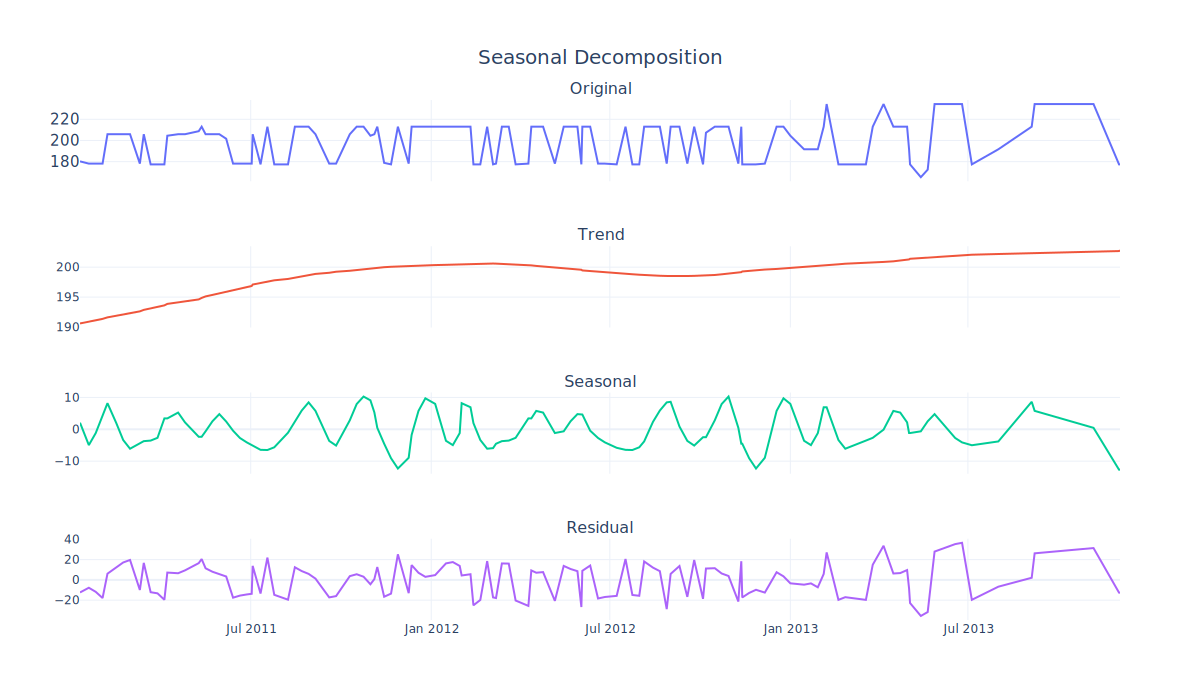

'not seasonal'

In [16]:
#Plot multi-seasonal decomposition using Fourier Decomposition as a seasonal model:
#For first variable:
stl = FourierDecomposition(model = "additive", n_fourier_terms=10)
res_ts_679023median_total_price = stl.fit(ts_679023median_total_price, seasonality=seasonality)
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/decompositions_initial/multi_seasonal_decomposition_fit_'
file_edit = file
file_to_use = file_edit + '679023median_total_price' + '_initial' + '.pik'
with open(file_to_use, 'wb') as f:
   pickle.dump(res_ts_679023median_total_price, f) #write df to .pik file on disk
#Calculate seasonal period:
from matrixprofile import *
pattern = res_ts_679023median_total_price.seasonal
pattern = pattern.to_numpy()
m = 5 #size of sub-sequences to compare for conserved features
mp = matrixProfile.stomp(pattern, m)
for ele in range(len(list(mp[1]))):
    if mp[1][ele] == float('inf'):
        #https://www.geeksforgeeks.org/python-infinity/https://codedamn.com/news/python/how-to-represent-infinity-in-python#
        #Accessed 14/06/2024
        mp[1][ele] = 0
mtfs , motif_d  = motifs.motifs(pattern, mp, max_motifs=10)
#mtfs = list of lists where each list is a motif with the indices of where each instance of the motif begins
#motif_d = how conserved each motif is
for ele in range(len(mtfs)):
    if len(mtfs[ele]) >= 3: #need two complete cycles for imputation = 3 indices of conserved features from the repeating motif
        motif = motif_d.index(min(motif_d[:(ele + 1)])) #best motif_d = most conserved
        dist_list = []
        for instance in range(len(mtfs[motif]) - 1):
            inst_current = mtfs[motif][instance]
            inst_next = mtfs[motif][instance + 1]
            dist_timestamps = inst_next - inst_current
            dist_list.append(dist_timestamps)
        import math
        seasonal_per = math.ceil(statistics.median(dist_list)) #(typical value as a measure of central tendency for a skewed or symmeteric 
        #(median = mean (1)) distribution):    
        #^(1) - https://online.stat.psu.edu/stat200/lesson/2/2.2/2.2.4/2.2.4.1
        #if median results in a .5 want higher val as for seasonal interpolation only integers allowed and better for pattern
        #to repeat too slow in model rather than overestimate for prices, featuring, units sold, displaying
        seasonal_period_list.append(seasonal_per)
    else:
        seasonal_period_list.append('not seasonal')
#^https://stackoverflow.com/questions/49873443/repeated-patterns-in-time-series-graphs - learned of Matrix Profile method
#Accessed 14/06/2024
#^http://www.cs.ucr.edu/~eamonn/Matrix_Profile_Tutorial_Part1.pdf - understood principles of Matrix Profile method
#Accessed 14/06/2024
#^http://www.cs.ucr.edu/~eamonn/MatrixProfile.html - found link to python package implementing Matrix Profile method, matrixprofile-ts
#Accessed 14/06/2024
#^https://github.com/target/matrixprofile-ts/blob/master/docs/examples/Motif%20Discovery.ipynb , https://github.com/target/matrixprofile-ts/blob/master/matrixprofile/matrixProfile.py
#Found source code and adapted it for calculating seasonal period from identified motifs
#Accessed 14/06/2024
#Find unique seasons:
entry_list = seasonal_period_list
found_list = []
unique_list = []
entry = []
entry_list_length = len(seasonal_period_list)
for i in range(entry_list_length):
    entry = entry_list[i]
    if entry not in found_list:
        unique_list.append(entry)
        found_list.append(entry)
unique_list
loopcount = len(unique_list)
i = 0
while i < loopcount:
    #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
    #Accessed 03/06/2024
    var = unique_list[i]
    if isinstance(var, str) == True:
        #^https://pythonprinciples.com/blog/check-if-var-is-string/
        #Accessed 14/06/2024
        unique_list.remove(unique_list[i])
        loopcount = int(loopcount - 1)
        #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
        #Accessed 03/06/2024
    else:
        i += 1
    #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
    #Accessed 03/06/2024  
if not unique_list:
    seasonal_per = 'not seasonal'
#^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
#Accessed 14/06/2024
else:
    for item in reversed(range(len(unique_list))):
        #^https://stackoverflow.com/questions/10665591/how-to-remove-list-elements-in-a-for-loop-in-python
        #Accessed 24/07/2024
        if unique_list[item] > (len(ts_df)/2): #need min observations for 2 cycles of the season to be valid
            del unique_list[item]
            #^https://note.nkmk.me/en/python-list-clear-pop-remove-del/#remove-items-by-index-or-slice-del
            #Accessed 23/06/2024
    if not unique_list:
        seasonal_per = 'not seasonal'
        #^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
        #Accessed 14/06/2024
    else:
        seasonal_per = min(unique_list, key=lambda x: abs(x - 52))
        #^https://medium.com/devcodef1com/match-lists-based-on-the-closest-value-in-python-5a0234548188#:~:text=Approach%202%3A%20Using%20the%20min()%20Function&text=The%20lambda%20function%20calculates%20the,which%20is%20the%20closest%20value.
        #Accessed 29/06/2024
        #knowing variables aggregated by median for all products and stores that are seasonal have seasonal period of 52, 
        #choose season closest to 52 - interpolator function as defined from source code can only take a single integer seasonal period argument, see below
#- https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/495cd6275ca3f3fd9951348d63fc0020a0f43636/src/imputation/interpolation.py

#Plot:
fig = res_ts_679023median_total_price.plot(interactive=True)
fig.update_layout(
            legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            )
        )
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/decompositions_initial/multi_seasonal_decomposition_679023median_total_price_initial.png")
fig.show(renderer="svg")
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/02-Decomposing%20Time%20Series.ipynb
#Accessed 06/06/2024
seasonal_per

Plot multi-seasonal decomposition using Fourier Decomposition as a seasonal model for all variables:

In [17]:
seasonal_period_list = []

In [18]:
#Plot multi-seasonal decomposition using Fourier Decomposition as a seasonal model:
import statistics
import time
start = time.time()
print('Start!')
# for var in range(1):
for var in range(len(col_list)):
    ts = globals()[("ts_" + str(col_list[var]))]
    ts = ts_df[col_list[var]]
    stl = FourierDecomposition(model = "additive", n_fourier_terms=10) 
    res_var = stl.fit(ts, seasonality=seasonality)
    file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/decompositions_initial/multi_seasonal_decomposition_fit_'
    file_edit = file
    file_to_use = file_edit + str(col_list[var]) + '_initial' + '.pik'
    with open(file_to_use, 'wb') as f:
       pickle.dump(res_var, f) #write df to .pik file on disk
    #Calculate seasonal period:
    from matrixprofile import *
    pattern = res_var.seasonal
    pattern = pattern.to_numpy()
    m = 5 #size of sub-sequences to compare for conserved features
    mp = matrixProfile.stomp(pattern, m)
    seasonal_periods_list = []
    for ele in range(len(list(mp[1]))):
        if mp[1][ele] == float('inf'):
            #https://www.geeksforgeeks.org/python-infinity/https://codedamn.com/news/python/how-to-represent-infinity-in-python#
            #Accessed 14/06/2024
            mp[1][ele] = 0
    mtfs , motif_d  = motifs.motifs(pattern, mp, max_motifs=10)
    #mtfs = list of lists where each list is a motif with the indices of where each instance of the motif begins
    #motif_d = how conserved each motif is
    for ele in range(len(mtfs)):
        if len(mtfs[ele]) >= 3: #need two complete cycles for imputation = 3 indices of conserved features from the repeating motif
            motif = motif_d.index(min(motif_d[:(ele + 1)])) #best motif_d = most conserved
            dist_list = []
            for instance in range(len(mtfs[motif]) - 1):
                inst_current = mtfs[motif][instance]
                inst_next = mtfs[motif][instance + 1]
                dist_timestamps = inst_next - inst_current
                dist_list.append(dist_timestamps)
            import math
            seasonal_per = math.ceil(statistics.median(dist_list)) #(typical value as a measure of central tendency for a skewed or symmeteric 
            #(median = mean (1)) distribution):    
            #^(1) - https://online.stat.psu.edu/stat200/lesson/2/2.2/2.2.4/2.2.4.1
            #if median results in a .5 want higher val as for seasonal interpolation only integers allowed and better for pattern
            #to repeat too slow in model rather than overestimate for prices, featuring, units sold, displaying
            seasonal_periods_list.append(seasonal_per)
        else:
            seasonal_periods_list.append('not seasonal')
    #^https://stackoverflow.com/questions/49873443/repeated-patterns-in-time-series-graphs - learned of Matrix Profile method
    #Accessed 14/06/2024
    #^http://www.cs.ucr.edu/~eamonn/Matrix_Profile_Tutorial_Part1.pdf - understood principles of Matrix Profile method
    #Accessed 14/06/2024
    #^http://www.cs.ucr.edu/~eamonn/MatrixProfile.html - found link to python package implementing Matrix Profile method, matrixprofile-ts
    #Accessed 14/06/2024
    #^https://github.com/target/matrixprofile-ts/blob/master/docs/examples/Motif%20Discovery.ipynb , https://github.com/target/matrixprofile-ts/blob/master/matrixprofile/matrixProfile.py
    #Found source code and adapted it for calculating seasonal period from identified motifs
    #Accessed 14/06/2024
    #Find unique seasons:
    entry_list = seasonal_periods_list
    found_list = []
    unique_list = []
    entry = []
    entry_list_length = len(seasonal_periods_list)
    for i in range(entry_list_length):
        entry = entry_list[i]
        if entry not in found_list:
            unique_list.append(entry)
            found_list.append(entry)
    unique_list
    loopcount = len(unique_list)
    i = 0
    while i < loopcount:
        #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
        #Accessed 03/06/2024
        entry_2 = unique_list[i]
        if isinstance(entry_2, str) == True:
            #^https://pythonprinciples.com/blog/check-if-var-is-string/
            #Accessed 14/06/2024
            unique_list.remove(unique_list[i])
            loopcount = int(loopcount - 1)
            #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
            #Accessed 03/06/2024
        else:
            i += 1
        #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
        #Accessed 03/06/2024  
    if not unique_list:
        seasonal_per = 'not seasonal'
    #^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
    #Accessed 14/06/2024
    else:
        for item in reversed(range(len(unique_list))):
            #^https://stackoverflow.com/questions/10665591/how-to-remove-list-elements-in-a-for-loop-in-python
            #Accessed 24/07/2024
            if unique_list[item] > (len(ts_df)/2): #need min observations for 2 cycles of the season to be valid
                del unique_list[item]
                #^https://note.nkmk.me/en/python-list-clear-pop-remove-del/#remove-items-by-index-or-slice-del
                #Accessed 23/06/2024
        if not unique_list:
            seasonal_per = 'not seasonal'
            #^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
            #Accessed 14/06/2024
        else:
             seasonal_per = min(unique_list, key=lambda x: abs(x - 52))
        #^https://medium.com/devcodef1com/match-lists-based-on-the-closest-value-in-python-5a0234548188#:~:text=Approach%202%3A%20Using%20the%20min()%20Function&text=The%20lambda%20function%20calculates%20the,which%20is%20the%20closest%20value.
        #Accessed 29/06/2024
        #knowing variables aggregated by median for all products and stores that are seasonal have seasonal period of 52, 
        #choose season closest to 52 - interpolator function as defined from source code can only take a single integer seasonal period argument, see below
    #- https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/495cd6275ca3f3fd9951348d63fc0020a0f43636/src/imputation/interpolation.py

    seasonal_period_list.append(seasonal_per)
    
    fig = res_var.plot(interactive=True)
    fig.update_layout(
                legend=dict(
                    font=dict(size=15),
                    orientation="h",
                    yanchor="bottom",
                    y=0.98,
                    xanchor="right",
                    x=1,
                ),
                yaxis=dict(
                    # title_text=ylabel,
                    titlefont=dict(size=15),
                    tickfont=dict(size=15),
                ),
                xaxis=dict(
                    # title_text=xlabel,
                    titlefont=dict(size=15),
                    tickfont=dict(size=15),
                )
            )
    #^https://www.datacamp.com/tutorial/python-append-string#
    #Accessed 12/06/2024
    file_2 = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/decompositions_initial/multi_seasonal_decomposition_'
    file_edit_2 = file_2
    file_to_use_2 = file_edit_2 + str(col_list[var]) + '_initial' + '.png'
    fig.write_image(file_to_use_2)
    #^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/02-Decomposing%20Time%20Series.ipynb
    #Accessed 06/06/2024
end = time.time()
print('secs: ', end - start) # time in seconds
print('min: ', (end - start)/60) # time in min

Start!


/opt/anaconda3/lib/python3.11/site-packages/matrixprofile/utils.py:177: RuntimeWarning:

invalid value encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/matrixprofile/utils.py:200: RuntimeWarning:

invalid value encountered in divide



secs:  12.091761827468872
min:  0.20152936379114786


In [19]:
seasonal_period_list_init = seasonal_period_list
seasonal_period_list_init

['not seasonal',
 52,
 52,
 52,
 'not seasonal',
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 'not seasonal',
 52,
 52,
 'not seasonal',
 'not seasonal',
 'not seasonal',
 52,
 52,
 52,
 52,
 'not seasonal',
 52,
 'not seasonal',
 'not seasonal',
 52,
 52,
 52,
 'not seasonal',
 52,
 'not seasonal',
 'not seasonal',
 52,
 52,
 'not seasonal',
 52,
 'not seasonal',
 'not seasonal',
 52,
 52,
 52,
 52,
 'not seasonal',
 52,
 'not seasonal',
 52,
 52,
 'not seasonal',
 52,
 52,
 52,
 52,
 52,
 52,
 'not seasonal',
 52,
 'not seasonal',
 52,
 52,
 'not seasonal',
 'not seasonal',
 52,
 52,
 52,
 52,
 52,
 'not seasonal',
 52,
 52,
 'not seasonal',
 52,
 'not seasonal',
 'not seasonal',
 52,
 'not seasonal',
 52,
 52,
 52,
 'not seasonal',
 'not seasonal',
 52,
 52,
 52,
 52,
 'not seasonal',
 'not seasonal',
 52,
 52,
 'not seasonal',
 'not seasonal',
 52,
 52,
 'not seasonal',
 52,
 52,
 52,
 'not seasonal',
 52,
 52,
 52,
 'not seasonal',
 52,
 'not seasonal',
 52,
 52,
 'not 

# Create complete timeseries dataframe and impute missing values

Add missing rows for October 2013:

In [20]:
import datetime
ts_df['timestamp'] = ts_df.index
first_column = ts_df.pop('timestamp') 
# insert column using insert(position,column_name, 
# first_column) function 
ts_df.insert(0, 'timestamp', first_column)
#^https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/
#Accessed 24/06/2024
ts_df = ts_df.set_index(np.arange(0, len(ts_df)))
drop_list = ts_df.columns.values[141:]
ts_df = ts_df.drop(drop_list, axis=1)
new_row_data = []
for i in range(141):
    new_row_data.append(np.nan)
    #^https://www.analyticsvidhya.com/blog/2023/12/supercharge-your-dataframes-mastering-row-appending-in-pandas/#:~:text=The%20append()%20function%20in,for%20beginners%20and%20seasoned%20professionals.&text=While%20this%20method%20is%20simple,multiple%20rows%20in%20a%20loop
    #Accessed 04/06/2024
print(new_row_data)
print(len(new_row_data))
timestamp = '09/07/2013'
index_list = []
for date in range(7):
    timestamp = pd.to_datetime(timestamp) + pd.DateOffset(days=7)
    index_list.insert(date, timestamp)
#^https://stackoverflow.com/questions/6871016/adding-days-to-a-date-in-python
#Accessed 09/06/2024
print(index_list)
from pandas import DataFrame, concat
for row in range(7):
    line = DataFrame(np.array([new_row_data]), columns=ts_df.columns.values)
    ts_df = concat([ts_df.iloc[:126 + row + 1], line, ts_df.iloc[row + 126 + 1:]]).reset_index(drop=True)
    #^https://stackoverflow.com/questions/15888648/is-it-possible-to-insert-a-row-at-an-arbitrary-position-in-a-dataframe-using-pan
    #Accessed 03/06/2024
    ts_df.loc[row + 126 + 1, ts_df.columns.values[0]] = index_list[row]
print(ts_df.tail(60))

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
141
[Timestamp('2013-09-14 00:00:00'), Timestamp('2013-09-21 00:00:00'), Timestamp('2013-09-28 00:00:00'), Timestamp('2013-10-05 00:00:00'), Timestamp('2013-10-12 00:00:00'), Timestamp('2013-10-19 00:00:00'), Timestamp('2013-10-26 00:00:00')]
     timestamp  679023median_total_price  245338med

/tmp/ipykernel_4422/2806510670.py:30: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/tmp/ipykernel_4422/2806510670.py:30: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/tmp/ipykernel_4422/2806510670.py:30: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

Create seasonality terms:

In [21]:
#Create seasonality terms:
ts_df = ts_df.set_index("timestamp")
ts_df["weekday_name"] = ts_df.index.day_name()
ts_df["weekday"] = ts_df.index.weekday
ts_df["week"] = ts_df.index.isocalendar().week
ts_df["day"] = ts_df.index.day
ts_df["date"] = ts_df.index.date
ts_df["month"] = ts_df.index.month
ts_df["month_name"] = ts_df.index.month_name()
ts_df["year"] = ts_df.index.year
#Making ordered categoricals to make for sorted plots
ts_df['month_name'] = pd.Categorical(ts_df['month_name'], categories=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], ordered=True)
ts_df['weekday_name'] = pd.Categorical(ts_df['weekday_name'], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
ts_df.head(60)
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

,679023median_total_price,245338median_total_price,222087median_total_price,223153median_total_price,223245median_total_price,222765median_total_price,547934median_total_price,378934median_total_price,219029median_total_price,216418median_total_price,...,546789percent_display,545621percent_display,weekday_name,weekday,week,day,date,month,month_name,year
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-01-08,180.2625,469.53750,226.93125,213.03750,205.2000,195.2250,177.4125,205.9125,312.7875,87.63750,...,0.571429,0.0,Saturday,5,1,8,2011-01-08,1,January,2011
2011-01-17,178.1250,426.78750,196.65000,190.23750,205.9125,240.8250,177.4125,177.4125,312.0750,93.33750,...,0.000000,0.0,Monday,0,3,17,2011-01-17,1,January,2011
2011-01-24,178.1250,426.78750,190.23750,190.23750,213.0375,240.8250,177.4125,177.4125,312.7875,85.50000,...,0.142857,0.0,Monday,0,4,24,2011-01-24,1,January,2011
2011-01-31,178.1250,448.16250,226.93125,212.32500,213.0375,240.8250,177.4125,177.4125,312.7875,84.07500,...,0.000000,0.0,Monday,0,5,31,2011-01-31,1,January,2011
2011-02-05,205.9125,469.53750,227.28750,213.03750,213.0375,234.4125,142.5000,177.4125,312.7875,87.63750,...,0.285714,0.0,Saturday,5,5,5,2011-02-05,2,February,2011
2011-02-14,205.9125,453.15000,122.55000,213.03750,180.9750,240.8250,177.4125,177.4125,178.1250,96.18750,...,0.142857,0.0,Monday,0,7,14,2011-02-14,2,February,2011
2011-02-21,205.9125,455.28750,114.00000,213.03750,175.9875,240.8250,177.4125,177.4125,179.5500,96.90000,...,0.142857,0.0,Monday,0,8,21,2011-02-21,2,February,2011
2011-02-28,205.9125,455.28750,149.62500,213.03750,183.8250,219.4500,177.4125,177.4125,312.7875,96.54375,...,0.142857,0.0,Monday,0,9,28,2011-02-28,2,February,2011
2011-03-10,178.1250,318.84375,211.61250,227.28750,208.7625,234.4125,177.4125,205.9125,312.7875,86.21250,...,0.000000,0.0,Thursday,3,10,10,2011-03-10,3,March,2011


In [22]:
#print(ts_df.tail(50))

Using darts for forecasting (see notebook 6) can't infer or set (as values missing) freq of the time index as the date indices are inconsistent (there are 3 frequencies: '8D' (every 8 calendar days), 'W-MON' (weekly beginning on Monday), 'B' (every business day). As W-MON dominant freq of the actual timestamps, keep W-MON records and impute other values to make 148 timestamps seperated in W-MON frequency, based on the seasonality of the actual (date-index inconsistent) data if seasonal (if not seasonal impute with the median as a heuristic (typical value as a measure of central tendency for a skewed or symmeteric (median = mean (1)) distribution)):  
- Impute seasonal data with seasonal period, negative imputed values with the median as a heuristic, percent values > 1 with the median as a heuristic (typical value as a measure of central tendency for a skewed or symmeteric (median = mean (1)) distribution)       
^(1) - https://online.stat.psu.edu/stat200/lesson/2/2.2/2.2.4/2.2.4.1    
Accessed 13/06/2024  

In [23]:
ts_df_2 = ts_df.copy()

### See below - add missing dates (not with a diff of 7 see below) to infer freq as W-MON:

In [24]:
ts_df_2['timestamp'] = ts_df_2.index
ts_df_2.set_index(np.arange(0, len(ts_df_2)))

,679023median_total_price,245338median_total_price,222087median_total_price,223153median_total_price,223245median_total_price,222765median_total_price,547934median_total_price,378934median_total_price,219029median_total_price,216418median_total_price,...,545621percent_display,weekday_name,weekday,week,day,date,month,month_name,year,timestamp
0,180.2625,469.5375,226.93125,213.0375,205.2000,195.2250,177.4125,205.9125,312.7875,87.63750,...,0.0,Saturday,5,1,8,2011-01-08,1,January,2011,2011-01-08
1,178.1250,426.7875,196.65000,190.2375,205.9125,240.8250,177.4125,177.4125,312.0750,93.33750,...,0.0,Monday,0,3,17,2011-01-17,1,January,2011,2011-01-17
2,178.1250,426.7875,190.23750,190.2375,213.0375,240.8250,177.4125,177.4125,312.7875,85.50000,...,0.0,Monday,0,4,24,2011-01-24,1,January,2011,2011-01-24
3,178.1250,448.1625,226.93125,212.3250,213.0375,240.8250,177.4125,177.4125,312.7875,84.07500,...,0.0,Monday,0,5,31,2011-01-31,1,January,2011,2011-01-31
4,205.9125,469.5375,227.28750,213.0375,213.0375,234.4125,142.5000,177.4125,312.7875,87.63750,...,0.0,Saturday,5,5,5,2011-02-05,2,February,2011,2011-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Saturday,5,42,19,2013-10-19,10,October,2013,2013-10-19
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Saturday,5,43,26,2013-10-26,10,October,2013,2013-10-26
134,234.4125,375.4875,203.77500,235.8375,223.7250,239.4000,177.4125,205.9125,327.0375,97.25625,...,0.0,Wednesday,2,45,6,2013-11-06,11,November,2013,2013-11-06
135,177.4125,355.5375,195.58125,177.4125,213.7500,227.2875,177.4125,155.3250,312.7875,88.70625,...,0.0,Monday,0,49,2,2013-12-02,12,December,2013,2013-12-02


In [25]:
import statistics
diff_dict = {}
count = 0
count_2 = 0
for row in range(len(ts_df_2['timestamp']) - 1):
    d1 = ts_df_2['timestamp'][row]
    d2 = ts_df_2['timestamp'][row + 1]
    diff_dict[(row + 1)] = abs((d2 - d1).days)
    if diff_dict[(row + 1)] == 9:
        count += 1
    if diff_dict[(row + 1)] == 7:
        count_2 += 1
print(diff_dict)
print(statistics.mode(list(diff_dict.values())))
print(min(list(diff_dict.values())))
print(count)
print(count_2)

{1: 9, 2: 7, 3: 7, 4: 5, 5: 9, 6: 7, 7: 7, 8: 10, 9: 4, 10: 7, 11: 7, 12: 7, 13: 3, 14: 11, 15: 7, 16: 14, 17: 3, 18: 4, 19: 7, 20: 7, 21: 7, 22: 7, 23: 7, 24: 7, 25: 5, 26: 1, 27: 8, 28: 7, 29: 7, 30: 14, 31: 7, 32: 7, 33: 7, 34: 7, 35: 14, 36: 7, 37: 14, 38: 7, 39: 7, 40: 7, 41: 4, 42: 3, 43: 7, 44: 7, 45: 7, 46: 11, 47: 3, 48: 7, 49: 7, 50: 10, 51: 11, 52: 7, 53: 7, 54: 2, 55: 9, 56: 3, 57: 7, 58: 7, 59: 6, 60: 3, 61: 6, 62: 7, 63: 7, 64: 13, 65: 3, 66: 5, 67: 7, 68: 12, 69: 9, 70: 7, 71: 7, 72: 4, 73: 1, 74: 8, 75: 8, 76: 7, 77: 12, 78: 9, 79: 7, 80: 7, 81: 5, 82: 9, 83: 7, 84: 7, 85: 4, 86: 9, 87: 8, 88: 7, 89: 9, 90: 3, 91: 9, 92: 7, 93: 7, 94: 10, 95: 3, 96: 1, 97: 7, 98: 7, 99: 9, 100: 12, 101: 7, 102: 7, 103: 14, 104: 7, 105: 7, 106: 6, 107: 3, 108: 12, 109: 7, 110: 21, 111: 7, 112: 11, 113: 10, 114: 7, 115: 7, 116: 2, 117: 1, 118: 11, 119: 7, 120: 7, 121: 21, 122: 7, 123: 10, 124: 27, 125: 34, 126: 3, 127: 7, 128: 7, 129: 7, 130: 7, 131: 7, 132: 7, 133: 7, 134: 11, 135: 26, 1

/tmp/ipykernel_4422/244707049.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_4422/244707049.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Add right no. of rows in right places and dates:

In [26]:
#Add right no. of empty rows in right places and dates:

from datetime import datetime, timedelta
ts_df_3 = ts_df.copy()
ts_df_3['timestamp'] = ts_df_3.index
first_column = ts_df_3.pop('timestamp') 
# insert column using insert(position,column_name, 
# first_column) function 
ts_df_3.insert(0, 'timestamp', first_column)
#^https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/
#Accessed 24/06/2024
ts_df_3 = ts_df_3.set_index(np.arange(0, len(ts_df_3)))
for timestamp in range(len(ts_df_3)):
    if ts_df_3['weekday_name'][timestamp] != 'Monday':
        ts_df_3.iloc[timestamp, :] = np.nan
        
ts_df_4 = ts_df.copy()
ts_df_4['timestamp'] = ts_df_4.index
first_column = ts_df_4.pop('timestamp') 
# insert column using insert(position,column_name, 
# first_column) function 
ts_df_4.insert(0, 'timestamp', first_column)
#^https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/
#Accessed 24/06/2024
ts_df_4 = ts_df_4.set_index(np.arange(0, len(ts_df_4)))
for timestamp in range(len(ts_df_4)):
    if ts_df_4['weekday_name'][timestamp] != 'Monday':
        ts_df_4.iloc[timestamp, :] = np.nan

ts_df_4['timestamp'][0] = ts_df_4['timestamp'][1] - timedelta(days=7)

date_range = pd.date_range('2011-01-10', periods=152, freq='W-MON')
ts_series = pd.Series(list(date_range))
print(len(ts_series))
# #^https://www.geeksforgeeks.org/creating-a-pandas-series-from-lists/
# #Accessed 22/06/2024
from pandas import DataFrame
ts_df_empty = DataFrame(columns = ts_df_4.columns.values, index = np.arange(0, len(ts_series)))
#^https://favtutor.com/blogs/pandas-empty-dataframe
#Accessed 22/06/2024
ts_df_empty['timestamp'] = ts_series

file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/imputed_vs_not_imputed_rows_series.pik'
with open(file, 'wb') as f:
    pickle.dump(ts_series, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      ts_series = pickle.load(f) #load pickle file 'file' into variable

print(ts_df_empty['timestamp'])
for row in range(len(ts_df_empty['timestamp'])):
    val = ts_df_empty['timestamp'][row]
    if not pd.isnull(val):
        for ind in range(len(ts_df_4['timestamp'])):
            if val == ts_df_4['timestamp'][ind]:
                ts_df_empty.iloc[row, :] = ts_df_4.iloc[ind, :]
ts_df = ts_df_empty        
print(ts_df[ts_df.columns.values[0]])

152
0     2011-01-10
1     2011-01-17
2     2011-01-24
3     2011-01-31
4     2011-02-07
         ...    
147   2013-11-04
148   2013-11-11
149   2013-11-18
150   2013-11-25
151   2013-12-02
Name: timestamp, Length: 152, dtype: datetime64[ns]
0     2011-01-10
1     2011-01-17
2     2011-01-24
3     2011-01-31
4     2011-02-07
         ...    
147   2013-11-04
148   2013-11-11
149   2013-11-18
150   2013-11-25
151   2013-12-02
Name: timestamp, Length: 152, dtype: datetime64[ns]


/tmp/ipykernel_4422/3960576017.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
# #Add dates to timestamp col:
# for row in range(len(ts_df['timestamp'])):
#     val = ts_df['timestamp'][row]
#     if pd.isnull(val):
#         ts_df['timestamp'][row] = ts_df['timestamp'][row - 1] + timedelta(days=7)
#         print(row)

# # date_range = pd.date_range('2011-01-10', periods=152, freq='W-MON')
# # match_dict = {}
# # dont_match_list = []
# # for ele in range(len(ts_df['timestamp'])):
# #     if ts_df['timestamp'][ele] in list(date_range):
# #         match_dict[ele] = list(date_range).index(ts_df['timestamp'][ele])
# #     else:
# #         dont_match_list.append(ele)
# # print(match_dict)
# # print(dont_match_list)
# # date_range = pd.date_range('2011-01-10', periods=152, freq='W-MON')
# # print(list(date_range))
print(ts_df['timestamp'][0:50])
print(ts_df['timestamp'][50:100])
print(ts_df['timestamp'][100:])

0    2011-01-10
1    2011-01-17
2    2011-01-24
3    2011-01-31
4    2011-02-07
5    2011-02-14
6    2011-02-21
7    2011-02-28
8    2011-03-07
9    2011-03-14
10   2011-03-21
11   2011-03-28
12   2011-04-04
13   2011-04-11
14   2011-04-18
15   2011-04-25
16   2011-05-02
17   2011-05-09
18   2011-05-16
19   2011-05-23
20   2011-05-30
21   2011-06-06
22   2011-06-13
23   2011-06-20
24   2011-06-27
25   2011-07-04
26   2011-07-11
27   2011-07-18
28   2011-07-25
29   2011-08-01
30   2011-08-08
31   2011-08-15
32   2011-08-22
33   2011-08-29
34   2011-09-05
35   2011-09-12
36   2011-09-19
37   2011-09-26
38   2011-10-03
39   2011-10-10
40   2011-10-17
41   2011-10-24
42   2011-10-31
43   2011-11-07
44   2011-11-14
45   2011-11-21
46   2011-11-28
47   2011-12-05
48   2011-12-12
49   2011-12-19
Name: timestamp, dtype: datetime64[ns]
50   2011-12-26
51   2012-01-02
52   2012-01-09
53   2012-01-16
54   2012-01-23
55   2012-01-30
56   2012-02-06
57   2012-02-13
58   2012-02-20
59   2012-02-27
6

In [28]:
ts_df.head()

,timestamp,679023median_total_price,245338median_total_price,222087median_total_price,223153median_total_price,223245median_total_price,222765median_total_price,547934median_total_price,378934median_total_price,219029median_total_price,...,546789percent_display,545621percent_display,weekday_name,weekday,week,day,date,month,month_name,year
0,2011-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
1,2011-01-17,178.125,426.7875,196.65,190.2375,205.9125,240.825,177.4125,177.4125,312.075,...,0.0,0.0,Monday,0.0,3,17.0,2011-01-17,1.0,January,2011.0
2,2011-01-24,178.125,426.7875,190.2375,190.2375,213.0375,240.825,177.4125,177.4125,312.7875,...,0.142857,0.0,Monday,0.0,4,24.0,2011-01-24,1.0,January,2011.0
3,2011-01-31,178.125,448.1625,226.93125,212.325,213.0375,240.825,177.4125,177.4125,312.7875,...,0.0,0.0,Monday,0.0,5,31.0,2011-01-31,1.0,January,2011.0
4,2011-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
drop_list = ts_df.columns.values[141:]
ts_df = ts_df.drop(drop_list, axis=1)
ts_df.head()

,timestamp,679023median_total_price,245338median_total_price,222087median_total_price,223153median_total_price,223245median_total_price,222765median_total_price,547934median_total_price,378934median_total_price,219029median_total_price,...,398721percent_display,217217percent_display,217777percent_display,219844percent_display,600934percent_display,673209percent_display,327492percent_display,300291percent_display,546789percent_display,545621percent_display
0,2011-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-17,178.125,426.7875,196.65,190.2375,205.9125,240.825,177.4125,177.4125,312.075,...,0.444444,0.230769,0.15,0.321429,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-01-24,178.125,426.7875,190.2375,190.2375,213.0375,240.825,177.4125,177.4125,312.7875,...,0.611111,0.153846,0.1,0.321429,0.0,0.0,0.5,0.666667,0.142857,0.0
3,2011-01-31,178.125,448.1625,226.93125,212.325,213.0375,240.825,177.4125,177.4125,312.7875,...,0.0,0.115385,0.05,0.214286,0.0,0.0,0.5,0.555556,0.0,0.0
4,2011-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/notebook4interimpickle.pik'
# # with open(file, 'wb') as f:
# #     pickle.dump(ts_df, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      ts_df = pickle.load(f) #load pickle file 'file' into variable

Impute seasonal data with seasonal period, negative imputed values with the median as a heuristic, percent values imputed > 1 with the median as a heuristic (typical value as a measure of central tendency for a skewed or symmeteric (median = mean (1)) distribution):    
^(1) - https://online.stat.psu.edu/stat200/lesson/2/2.2/2.2.4/2.2.4.1    
Accessed 13/06/2024   

In [31]:
from src.imputation.interpolation import SeasonalInterpolation
import statistics
import time
col_list = list(ts_df.columns.values[1:])
start = time.time()
print('Start!')
row_orig = 0 #to begin row orig = row 0
for col in range(len(col_list)):
    if seasonal_period_list[col] != 'not seasonal':
        ts = ts_df[col_list[col]]
        found_output = col_list[col].find('median_total_price')
        if found_output != -1: 
            ts_df[col_list[col]] = SeasonalInterpolation(seasonal_period=seasonal_period_list[col]).fit_transform(ts.values.reshape(-1,1))
            for row in range(len(ts)):
                if ts_df[col_list[col]][row] < 0:
                    if row == 0: #to begin row orig = row 0
                        ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                    else:
                        if ts_df['timestamp'][row] in ts_df_orig['timestamp']:
                            row_orig = list(ts_df_orig['timestamp']).index(ts_df['timestamp'][row])
                            ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                        else:
                            ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
        found_output = col_list[col].find('median_base_price')
        if found_output != -1: 
            ts_df[col_list[col]] = SeasonalInterpolation(seasonal_period=seasonal_period_list[col]).fit_transform(ts.values.reshape(-1,1))
            for row in range(len(ts)):
                if ts_df[col_list[col]][row] < 0:
                    if row == 0: #to begin row orig = row 0
                        ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                    else:
                        if ts_df['timestamp'][row] in ts_df_orig['timestamp']:
                            row_orig = list(ts_df_orig['timestamp']).index(ts_df['timestamp'][row])
                            ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                        else:
                            ts[row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
        found_output = col_list[col].find('median_units_sold')
        if found_output != -1: 
            ts_df[col_list[col]] = SeasonalInterpolation(seasonal_period=seasonal_period_list[col]).fit_transform(ts.values.reshape(-1,1))
            for row in range(len(ts)):
                if ts_df[col_list[col]][row] < 0:
                    if row == 0: #to begin row orig = row 0
                        ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                    else:
                        if ts_df['timestamp'][row] in ts_df_orig['timestamp']:
                            row_orig = list(ts_df_orig['timestamp']).index(ts_df['timestamp'][row])
                            ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                        else:
                            ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
        found_output = col_list[col].find('percent_featured')
        if found_output != -1: 
            ts_df[col_list[col]] = SeasonalInterpolation(seasonal_period=seasonal_period_list[col]).fit_transform(ts.values.reshape(-1,1))
            for row in range(len(ts)):
                if ts_df[col_list[col]][row] < 0:
                    if row == 0: #to begin row orig = row 0
                        ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                    else:
                        if ts_df['timestamp'][row] in ts_df_orig['timestamp']:
                            row_orig = list(ts_df_orig['timestamp']).index(ts_df['timestamp'][row])
                            ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                        else:
                            ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                if ts_df[col_list[col]][row] > 1:
                    if row == 0: #to begin row orig = row 0
                        ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                    else:
                        if ts_df['timestamp'][row] in ts_df_orig['timestamp']:
                            row_orig = list(ts_df_orig['timestamp']).index(ts_df['timestamp'][row])
                            ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                        else:
                            ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
        found_output = col_list[col].find('percent_display')
        if found_output != -1: 
            ts_df[col_list[col]] = SeasonalInterpolation(seasonal_period=seasonal_period_list[col]).fit_transform(ts.values.reshape(-1,1))
            for row in range(len(ts)):
                if ts_df[col_list[col]][row] < 0:
                    if row == 0: #to begin row orig = row 0
                        ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                    else:
                        if ts_df['timestamp'][row] in ts_df_orig['timestamp']:
                            row_orig = list(ts_df_orig['timestamp']).index(ts_df['timestamp'][row])
                            ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                        else:
                            ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                if ts_df[col_list[col]][row] > 1:
                    if row == 0: #to begin row orig = row 0
                        ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                    else:
                        if ts_df['timestamp'][row] in ts_df_orig['timestamp']:
                            row_orig = list(ts_df_orig['timestamp']).index(ts_df['timestamp'][row])
                            ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                        else:
                            ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
    if seasonal_period_list[col] == 'not seasonal':
        ts = ts_df[col_list[col]]
        for row in range(len(ts)):
            val = ts_df[col_list[col]].loc[row]
            if pd.isnull(val):
                if row == 0: #to begin row orig = row 0
                    ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                else:
                    if ts_df['timestamp'][row] in ts_df_orig['timestamp']:
                        row_orig = list(ts_df_orig['timestamp']).index(ts_df['timestamp'][row])
                        ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
                    else:
                        ts_df[col_list[col]][row] = statistics.median(ts_df_orig[col_list[col]][:row_orig + 1]) #impute with the median as a heuristic
end = time.time()
print('secs: ', end - start) # time in seconds
print('min: ', (end - start)/60) # time in min
print(ts_df.tail(20))
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/02-Decomposing%20Time%20Series.ipynb
#Accessed 06/06/2024

Start!


/tmp/ipykernel_4422/366038523.py:100: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4422/366038523.py:106: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4422/366038523.py:106: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4422/366038523.py:106: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

secs:  1.1523950099945068
min:  0.019206583499908447
     timestamp 679023median_total_price  245338median_total_price  \
132 2013-07-22                 180.2625                351.337573   
133 2013-07-29                 180.2625                348.866618   
134 2013-08-05                 180.2625                346.541436   
135 2013-08-12                 180.2625                344.265707   
136 2013-08-19                 180.2625                342.002484   
137 2013-08-26                 180.2625                339.743776   
138 2013-09-02                 180.2625                337.437058   
139 2013-09-09                 180.2625                335.036657   
140 2013-09-16                 180.2625                339.733546   
141 2013-09-23                 180.2625                294.553097   
142 2013-09-30                 180.2625                299.071755   
143 2013-10-07                 180.2625                303.589217   
144 2013-10-14                 180.2625           

In [32]:
# print(ts_df.head(20))
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 151
Columns: 141 entries, timestamp to 545621percent_display
dtypes: datetime64[ns](1), float64(97), object(43)
memory usage: 172.7+ KB


Create seasonality terms:

In [33]:
ts_df = ts_df.set_index("timestamp")
ts_df["weekday_name"] = ts_df.index.day_name()
ts_df["weekday"] = ts_df.index.weekday
ts_df["week"] = ts_df.index.isocalendar().week
ts_df["day"] = ts_df.index.day
ts_df["date"] = ts_df.index.date
ts_df["month"] = ts_df.index.month
ts_df["month_name"] = ts_df.index.month_name()
ts_df["year"] = ts_df.index.year
#Making ordered categoricals to make for sorted plots
ts_df['month_name'] = pd.Categorical(ts_df['month_name'], categories=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], ordered=True)
ts_df['weekday_name'] = pd.Categorical(ts_df['weekday_name'], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
ts_df.head(60)
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

,679023median_total_price,245338median_total_price,222087median_total_price,223153median_total_price,223245median_total_price,222765median_total_price,547934median_total_price,378934median_total_price,219029median_total_price,216418median_total_price,...,546789percent_display,545621percent_display,weekday_name,weekday,week,day,date,month,month_name,year
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-01-10,180.2625,469.537500,226.931250,213.037500,205.2,195.225000,177.412500,205.912500,312.787500,87.637500,...,0.571429,0.000000e+00,Monday,0,2,10,2011-01-10,1,January,2011
2011-01-17,178.125,426.787500,196.650000,190.237500,205.9125,240.825000,177.412500,177.412500,312.075000,93.337500,...,0.000000,0.000000e+00,Monday,0,3,17,2011-01-17,1,January,2011
2011-01-24,178.125,426.787500,190.237500,190.237500,213.0375,240.825000,177.412500,177.412500,312.787500,85.500000,...,0.142857,0.000000e+00,Monday,0,4,24,2011-01-24,1,January,2011
2011-01-31,178.125,448.162500,226.931250,212.325000,213.0375,240.825000,177.412500,177.412500,312.787500,84.075000,...,0.000000,0.000000e+00,Monday,0,5,31,2011-01-31,1,January,2011
2011-02-07,180.2625,448.795621,175.185694,212.135054,205.2,240.792458,177.600521,177.604805,245.708337,90.036567,...,0.071772,3.122502e-17,Monday,0,6,7,2011-02-07,2,February,2011
2011-02-14,205.9125,453.150000,122.550000,213.037500,180.975,240.825000,177.412500,177.412500,178.125000,96.187500,...,0.142857,0.000000e+00,Monday,0,7,14,2011-02-14,2,February,2011
2011-02-21,205.9125,455.287500,114.000000,213.037500,175.9875,240.825000,177.412500,177.412500,179.550000,96.900000,...,0.142857,0.000000e+00,Monday,0,8,21,2011-02-21,2,February,2011
2011-02-28,205.9125,455.287500,149.625000,213.037500,183.825,219.450000,177.412500,177.412500,312.787500,96.543750,...,0.142857,0.000000e+00,Monday,0,9,28,2011-02-28,2,February,2011
2011-03-07,180.2625,441.038668,164.327741,213.023825,205.2,219.450000,177.414784,177.431566,312.786438,95.125495,...,0.071085,1.387779e-17,Monday,0,10,7,2011-03-07,3,March,2011


In [34]:
ts_df['245387percent_featured']

timestamp
2011-01-10    0.000000
2011-01-17    1.000000
2011-01-24    1.000000
2011-01-31    0.000000
2011-02-07    0.013889
                ...   
2013-11-04    0.000000
2013-11-11    0.836862
2013-11-18    0.000000
2013-11-25    0.000000
2013-12-02    1.000000
Name: 245387percent_featured, Length: 152, dtype: float64

Import libraries for multi-seasonal decomposition:

In [35]:
#Import libraries for multi-seasonal decomposition:
from statsmodels.tsa.seasonal import seasonal_decompose
from src.decomposition.seasonal import STL, FourierDecomposition, MultiSeasonalDecomposition

In [36]:
print(col_list)

['679023median_total_price', '245338median_total_price', '222087median_total_price', '223153median_total_price', '223245median_total_price', '222765median_total_price', '547934median_total_price', '378934median_total_price', '219029median_total_price', '216418median_total_price', '219009median_total_price', '217390median_total_price', '216233median_total_price', '216425median_total_price', '320485median_total_price', '300021median_total_price', '245387median_total_price', '216419median_total_price', '398721median_total_price', '217217median_total_price', '217777median_total_price', '219844median_total_price', '600934median_total_price', '673209median_total_price', '327492median_total_price', '300291median_total_price', '546789median_total_price', '545621median_total_price', '679023median_base_price', '245338median_base_price', '222087median_base_price', '223153median_base_price', '223245median_base_price', '222765median_base_price', '547934median_base_price', '378934median_base_price',

Can create series for each variable:

In [37]:
# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)
for var in range(len(col_list)):
    globals()[("ts_" + str(col_list[var]))] = ts_df[col_list[var]]
#^https://stackoverflow.com/questions/19300174/how-to-assign-each-element-of-a-list-to-a-separate-variable
#Accessed 11/06/2024

In [38]:
ts_679023median_total_price

timestamp
2011-01-10    180.2625
2011-01-17     178.125
2011-01-24     178.125
2011-01-31     178.125
2011-02-07    180.2625
                ...   
2013-11-04    180.2625
2013-11-11    180.2625
2013-11-18    180.2625
2013-11-25    180.2625
2013-12-02    177.4125
Name: 679023median_total_price, Length: 152, dtype: object

In [39]:
ts_545621percent_display

timestamp
2011-01-10    0.000000e+00
2011-01-17    0.000000e+00
2011-01-24    0.000000e+00
2011-01-31    0.000000e+00
2011-02-07    3.122502e-17
                  ...     
2013-11-04    1.473499e-02
2013-11-11    3.166068e-01
2013-11-18    3.221823e-01
2013-11-25    0.000000e+00
2013-12-02    0.000000e+00
Name: 545621percent_display, Length: 152, dtype: float64

# FINAL VARIABLE MULTI-SEASONAL DECOMPOSITION USING FOURIER DECOMPOSITION

* Need to find imputed data seasons for imputation after outlier detection, for assessing variable forecastability, and for feature engineering:
    * Data Leakage: "Data Leakage is the term used when the data from outside i.e. not part of training dataset is used for the learning process of the model. This additional learning of information by the applied model will disapprove the computed estimated performance of the model" - "Data Wrangling and Data Leakage in Machine Learning for Healthcare" - Saravanan, N. et al., 2018
    * Using seasonality that is not a property of the training dataset (previous seasons present in data before imputation of extra timestamps to make time series frequency 'W-MON' that are no longer a property of the variables of the data now) introduces information from outside the training dataset into the learning process of the model, causing data leakage.
* Use Fourier terms over STL method because this is "robust to outliers" when "doing regularized regression using the Fourier terms on the signal", "decoupling the resolution of the data and the expected seasonality".     

^Source: Modern Time Series Forecasting with Python (Manu Joseph, 2022)


Plot multi-seasonal decomposition using Fourier Decomposition as a seasonal model:

Make custom seasonality term using "month" and "week_of_month" (poor seasonality with "year" also included):

In [40]:
#Making custom seasonality term
ts_df["week_of_month"] = pd.Series(np.zeros(len(ts_df)), index=ts_df.index)
from math import ceil
def get_week_of_month(date):
   first_day = date.replace(day=1)

   day_of_month = date.day

   if(first_day.weekday() == 6):
       adjusted_dom = day_of_month + ((1 + first_day.weekday()) / 7)
   else:
       adjusted_dom = day_of_month + first_day.weekday()

   return int(ceil(adjusted_dom/7.0))
#^https://stackoverflow.com/questions/3806473/week-number-of-the-month/26662038#26662038
#Accessed 10/06/2024
for row in range(len(ts_df_2)):
    ts_df["week_of_month"][row] = get_week_of_month(ts_df_2['timestamp'][row])
#Creating a sorted unique combination df
map_df = ts_df[["month", "week_of_month"]].drop_duplicates().sort_values(["month", "week_of_month"])
# Assigning an ordinal variable to capture the order
map_df["map"] = np.arange(1, len(map_df)+1)
# mapping the oprdinal mapping back to the original df and getting the seasonality array
seasonality = ts_df.merge(map_df, on=["month", "week_of_month"], how='left', validate="many_to_one")['map']
seasonality = seasonality.to_numpy(seasonality)
seasonality
# #^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/02-Decomposing%20Time%20Series.ipynb
# #Accessed 06/06/2024

/tmp/ipykernel_4422/1785069018.py:18: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_4422/1785069018.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4422/1785069018.py:18: FutureWarning:

Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`



array([ 2,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 17, 17, 19, 20, 22,
       22, 23, 24, 25, 27, 28, 29, 30, 31, 31, 33, 34, 41, 38, 39, 40, 41,
       44, 46, 47, 45, 52, 53, 54, 49, 50, 57, 58, 59, 56, 63, 64, 65, 61,
        3,  4,  5,  1,  2,  8,  9, 10,  7, 12, 13, 14, 15, 17, 17, 18, 19,
       16, 23, 24, 25, 21, 26, 28, 29, 30, 32, 33, 34, 35, 31, 39, 40, 41,
       37, 45, 46, 47, 43, 49, 51, 52, 53, 50, 57, 57, 58, 59, 62, 64, 65,
       61, 63,  4,  5,  2,  2,  9, 10,  9, 10, 11, 13, 14, 15, 16, 16, 18,
       19, 20, 24, 25, 21, 21, 26, 27, 28, 29, 35, 31, 32, 33, 34, 38, 37,
       37, 36, 42, 42, 42, 42, 42, 48, 48, 48, 48, 55, 55, 55, 55, 60])

## Fitting the decomposition object for all variables

***Ran for each variable in col_list (list of the variables)***

In [41]:
seasonal_period_list = []

In [42]:
round((32/(900))*148) #size of sub-sequences to compare for conserved features in time - github example used 32 for sequence of 
#approx. length 900 = 32/900

5

Plot multi-seasonal decomposition using Fourier Decomposition as a seasonal model - one variable as an example:

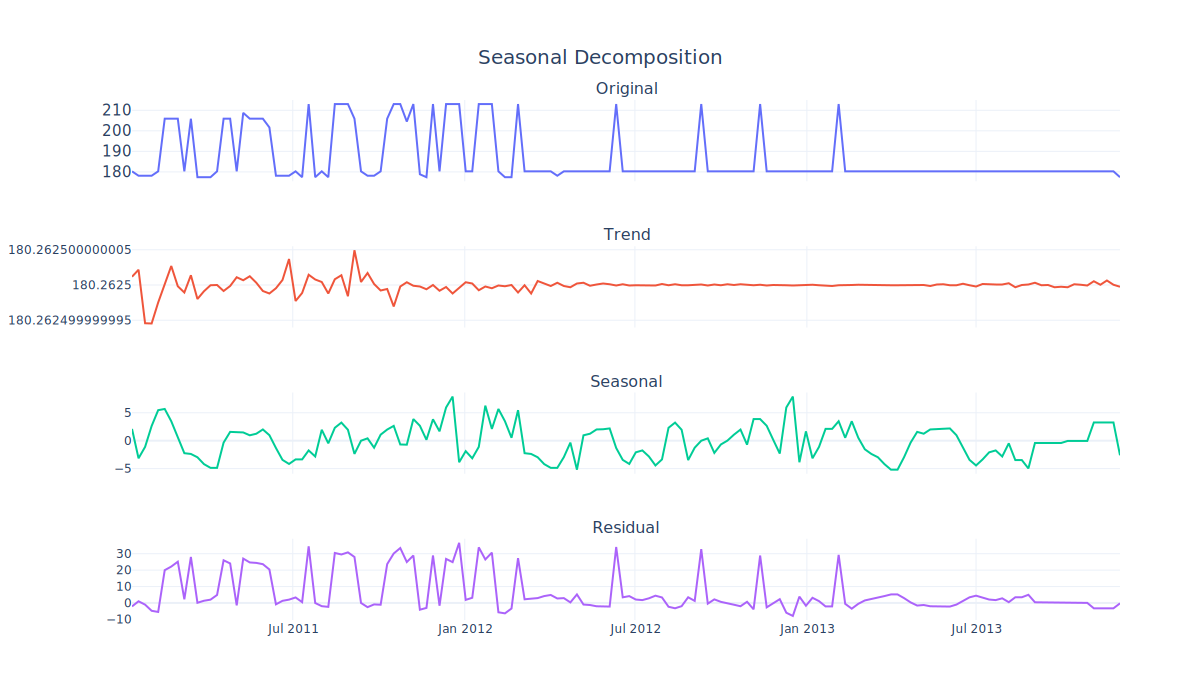

52

In [43]:
#Plot multi-seasonal decomposition using Fourier Decomposition as a seasonal model:
#For first variable:
stl = FourierDecomposition(model = "additive", n_fourier_terms=10)
res_ts_679023median_total_price = stl.fit(ts_679023median_total_price, seasonality=seasonality)
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/decompositions/multi_seasonal_decomposition_fit_'
file_edit = file
file_to_use = file_edit + '679023median_total_price' + '.pik'
with open(file_to_use, 'wb') as f:
   pickle.dump(res_ts_679023median_total_price, f) #write df to .pik file on disk
#Calculate seasonal period:
from matrixprofile import *
pattern = res_ts_679023median_total_price.seasonal
pattern = pattern.to_numpy()
m = 5 #size of sub-sequences to compare for conserved features
mp = matrixProfile.stomp(pattern, m)
for ele in range(len(list(mp[1]))):
    if mp[1][ele] == float('inf'):
        #https://www.geeksforgeeks.org/python-infinity/https://codedamn.com/news/python/how-to-represent-infinity-in-python#
        #Accessed 14/06/2024
        mp[1][ele] = 0
mtfs , motif_d  = motifs.motifs(pattern, mp, max_motifs=10)
#mtfs = list of lists where each list is a motif with the indices of where each instance of the motif begins
#motif_d = how conserved each motif is
dist_lists_list = []
for ele in range(len(mtfs)):
    if len(mtfs[ele]) >= 3: #need two complete cycles for imputation = 3 indices of conserved features from the repeating motif
        motif = motif_d.index(min(motif_d[:(ele + 1)])) #best motif_d = most conserved
        dist_list = []
        for instance in range(len(mtfs[motif]) - 1):
            inst_current = mtfs[motif][instance]
            inst_next = mtfs[motif][instance + 1]
            dist_timestamps = inst_next - inst_current
            dist_list.append(dist_timestamps)
        import math
        seasonal_per = math.ceil(statistics.median(dist_list)) #(typical value as a measure of central tendency for a skewed or symmeteric 
        #(median = mean (1)) distribution):    
        #^(1) - https://online.stat.psu.edu/stat200/lesson/2/2.2/2.2.4/2.2.4.1
        #if median results in a .5 want higher val as for seasonal interpolation only integers allowed and better for pattern
        #to repeat too slow in model rather than overestimate for prices, featuring, units sold, displaying
        seasonal_period_list.append(seasonal_per)
    else:
        seasonal_period_list.append('not seasonal')
#^https://stackoverflow.com/questions/49873443/repeated-patterns-in-time-series-graphs - learned of Matrix Profile method
#Accessed 14/06/2024
#^http://www.cs.ucr.edu/~eamonn/Matrix_Profile_Tutorial_Part1.pdf - understood principles of Matrix Profile method
#Accessed 14/06/2024
#^http://www.cs.ucr.edu/~eamonn/MatrixProfile.html - found link to python package implementing Matrix Profile method, matrixprofile-ts
#Accessed 14/06/2024
#^https://github.com/target/matrixprofile-ts/blob/master/docs/examples/Motif%20Discovery.ipynb , https://github.com/target/matrixprofile-ts/blob/master/matrixprofile/matrixProfile.py
#Found source code and adapted it for calculating seasonal period from identified motifs
#Accessed 14/06/2024
#Find unique seasons:
entry_list = seasonal_period_list
found_list = []
unique_list = []
entry = []
entry_list_length = len(seasonal_period_list)
for i in range(entry_list_length):
    entry = entry_list[i]
    if entry not in found_list:
        unique_list.append(entry)
        found_list.append(entry)
unique_list
loopcount = len(unique_list)
i = 0
while i < loopcount:
    #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
    #Accessed 03/06/2024
    var = unique_list[i]
    if isinstance(var, str) == True:
        #^https://pythonprinciples.com/blog/check-if-var-is-string/
        #Accessed 14/06/2024
        unique_list.remove(unique_list[i])
        loopcount = int(loopcount - 1)
        #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
        #Accessed 03/06/2024
    else:
        i += 1
    #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
    #Accessed 03/06/2024  
if not unique_list:
    seasonal_per = 'not seasonal'
#^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
#Accessed 14/06/2024
else:
    for item in reversed(range(len(unique_list))):
        #^https://stackoverflow.com/questions/10665591/how-to-remove-list-elements-in-a-for-loop-in-python
        #Accessed 24/07/2024
        if unique_list[item] > (len(ts_df)/2): #need min observations for 2 cycles of the season to be valid
            del unique_list[item]
            #^https://note.nkmk.me/en/python-list-clear-pop-remove-del/#remove-items-by-index-or-slice-del
            #Accessed 23/06/2024
    if not unique_list:
        seasonal_per = 'not seasonal'
        #^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
        #Accessed 14/06/2024
    else:
        seasonal_per = min(unique_list) #choose min season so for imputing use the season most likely to affect the data over 
     #the range - interpolator function as defined from source code can only take a single integer seasonal period argument, see below
#- https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/495cd6275ca3f3fd9951348d63fc0020a0f43636/src/imputation/interpolation.py

#Plot:
fig = res_ts_679023median_total_price.plot(interactive=True)
fig.update_layout(
            legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            )
        )
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/multi_seasonal_decomposition_679023median_total_price.png")
fig.show(renderer="svg")
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/02-Decomposing%20Time%20Series.ipynb
#Accessed 06/06/2024
seasonal_per

Plot multi-seasonal decomposition using Fourier Decomposition as a seasonal model for all variables:

In [44]:
seasonal_period_list = []

In [45]:
#Plot multi-seasonal decomposition using Fourier Decomposition as a seasonal model:
import statistics
import time
start = time.time()
print('Start!')
# for var in range(1):
for var in range(len(col_list)):
    ts = globals()[("ts_" + str(col_list[var]))]
    ts = ts_df[col_list[var]]
    stl = FourierDecomposition(model = "additive", n_fourier_terms=10) 
    res_var = stl.fit(ts, seasonality=seasonality)
    file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/decompositions/multi_seasonal_decomposition_fit_'
    file_edit = file
    file_to_use = file_edit + str(col_list[var]) + '.pik'
    with open(file_to_use, 'wb') as f:
       pickle.dump(res_var, f) #write df to .pik file on disk
    #Calculate seasonal period:
    from matrixprofile import *
    pattern = res_var.seasonal
    pattern = pattern.to_numpy()
    m = 5 #size of sub-sequences to compare for conserved features
    mp = matrixProfile.stomp(pattern, m)
    seasonal_periods_list = []
    for ele in range(len(list(mp[1]))):
        if mp[1][ele] == float('inf'):
            #https://www.geeksforgeeks.org/python-infinity/https://codedamn.com/news/python/how-to-represent-infinity-in-python#
            #Accessed 14/06/2024
            mp[1][ele] = 0
    mtfs , motif_d  = motifs.motifs(pattern, mp, max_motifs=10)
    #mtfs = list of lists where each list is a motif with the indices of where each instance of the motif begins
    #motif_d = how conserved each motif is
    for ele in range(len(mtfs)):
        if len(mtfs[ele]) >= 3: #need two complete cycles for imputation = 3 indices of conserved features from the repeating motif
            motif = motif_d.index(min(motif_d[:(ele + 1)])) #best motif_d = most conserved
            dist_list = []
            for instance in range(len(mtfs[motif]) - 1):
                inst_current = mtfs[motif][instance]
                inst_next = mtfs[motif][instance + 1]
                dist_timestamps = inst_next - inst_current
                dist_list.append(dist_timestamps)
            import math
            seasonal_per = math.ceil(statistics.median(dist_list)) #(typical value as a measure of central tendency for a skewed or symmeteric 
            #(median = mean (1)) distribution):    
            #^(1) - https://online.stat.psu.edu/stat200/lesson/2/2.2/2.2.4/2.2.4.1
            #if median results in a .5 want higher val as for seasonal interpolation only integers allowed and better for pattern
            #to repeat too slow in model rather than overestimate for prices, featuring, units sold, displaying
            seasonal_periods_list.append(seasonal_per)
        else:
            seasonal_periods_list.append('not seasonal')
    #^https://stackoverflow.com/questions/49873443/repeated-patterns-in-time-series-graphs - learned of Matrix Profile method
    #Accessed 14/06/2024
    #^http://www.cs.ucr.edu/~eamonn/Matrix_Profile_Tutorial_Part1.pdf - understood principles of Matrix Profile method
    #Accessed 14/06/2024
    #^http://www.cs.ucr.edu/~eamonn/MatrixProfile.html - found link to python package implementing Matrix Profile method, matrixprofile-ts
    #Accessed 14/06/2024
    #^https://github.com/target/matrixprofile-ts/blob/master/docs/examples/Motif%20Discovery.ipynb , https://github.com/target/matrixprofile-ts/blob/master/matrixprofile/matrixProfile.py
    #Found source code and adapted it for calculating seasonal period from identified motifs
    #Accessed 14/06/2024
    #Find unique seasons:
    entry_list = seasonal_periods_list
    found_list = []
    unique_list = []
    entry = []
    entry_list_length = len(seasonal_periods_list)
    for i in range(entry_list_length):
        entry = entry_list[i]
        if entry not in found_list:
            unique_list.append(entry)
            found_list.append(entry)
    unique_list
    loopcount = len(unique_list)
    i = 0
    while i < loopcount:
        #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
        #Accessed 03/06/2024
        entry_2 = unique_list[i]
        if isinstance(entry_2, str) == True:
            #^https://pythonprinciples.com/blog/check-if-var-is-string/
            #Accessed 14/06/2024
            unique_list.remove(unique_list[i])
            loopcount = int(loopcount - 1)
            #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
            #Accessed 03/06/2024
        else:
            i += 1
        #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
        #Accessed 03/06/2024  
    if not unique_list:
        seasonal_per = 'not seasonal'
    #^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
    #Accessed 14/06/2024
    else:
        for item in reversed(range(len(unique_list))):
            #^https://stackoverflow.com/questions/10665591/how-to-remove-list-elements-in-a-for-loop-in-python
            #Accessed 24/07/2024
            if unique_list[item] > (len(ts_df)/2): #need min observations for 2 cycles of the season to be valid
                del unique_list[item]
                #^https://note.nkmk.me/en/python-list-clear-pop-remove-del/#remove-items-by-index-or-slice-del
                #Accessed 23/06/2024
        if not unique_list:
            seasonal_per = 'not seasonal'
            #^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
            #Accessed 14/06/2024
        else:
             seasonal_per = min(unique_list, key=lambda x: abs(x - 52))
        #^https://medium.com/devcodef1com/match-lists-based-on-the-closest-value-in-python-5a0234548188#:~:text=Approach%202%3A%20Using%20the%20min()%20Function&text=The%20lambda%20function%20calculates%20the,which%20is%20the%20closest%20value.
        #Accessed 29/06/2024
        #knowing variables aggregated by median for all products and stores that are seasonal have seasonal period of 52, 
        #choose season closest to 52 - interpolator function as defined from source code can only take a single integer seasonal period argument, see below
    #- https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/495cd6275ca3f3fd9951348d63fc0020a0f43636/src/imputation/interpolation.py

    seasonal_period_list.append(seasonal_per)
    
    fig = res_var.plot(interactive=True)
    fig.update_layout(
                legend=dict(
                    font=dict(size=15),
                    orientation="h",
                    yanchor="bottom",
                    y=0.98,
                    xanchor="right",
                    x=1,
                ),
                yaxis=dict(
                    # title_text=ylabel,
                    titlefont=dict(size=15),
                    tickfont=dict(size=15),
                ),
                xaxis=dict(
                    # title_text=xlabel,
                    titlefont=dict(size=15),
                    tickfont=dict(size=15),
                )
            )
    #^https://www.datacamp.com/tutorial/python-append-string#
    #Accessed 12/06/2024
    file_2 = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/decompositions/multi_seasonal_decomposition_'
    file_edit_2 = file_2
    file_to_use_2 = file_edit_2 + str(col_list[var]) + '.png'
    fig.write_image(file_to_use_2)
    #^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/02-Decomposing%20Time%20Series.ipynb
    #Accessed 06/06/2024
end = time.time()
print('secs: ', end - start) # time in seconds
print('min: ', (end - start)/60) # time in min

Start!


/opt/anaconda3/lib/python3.11/site-packages/matrixprofile/utils.py:68: RuntimeWarning:

invalid value encountered in sqrt

/opt/anaconda3/lib/python3.11/site-packages/matrixprofile/utils.py:68: RuntimeWarning:

invalid value encountered in sqrt

/opt/anaconda3/lib/python3.11/site-packages/matrixprofile/utils.py:68: RuntimeWarning:

invalid value encountered in sqrt

/opt/anaconda3/lib/python3.11/site-packages/matrixprofile/utils.py:68: RuntimeWarning:

invalid value encountered in sqrt

/opt/anaconda3/lib/python3.11/site-packages/matrixprofile/utils.py:68: RuntimeWarning:

invalid value encountered in sqrt

/opt/anaconda3/lib/python3.11/site-packages/matrixprofile/utils.py:68: RuntimeWarning:

invalid value encountered in sqrt

/opt/anaconda3/lib/python3.11/site-packages/matrixprofile/utils.py:68: RuntimeWarning:

invalid value encountered in sqrt

/opt/anaconda3/lib/python3.11/site-packages/matrixprofile/utils.py:68: RuntimeWarning:

invalid value encountered in sqrt

/opt/anaconda3/l

secs:  12.753209829330444
min:  0.2125534971555074


/opt/anaconda3/lib/python3.11/site-packages/matrixprofile/utils.py:68: RuntimeWarning:

invalid value encountered in sqrt



In [46]:
seasonal_period_list_init

['not seasonal',
 52,
 52,
 52,
 'not seasonal',
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 'not seasonal',
 52,
 52,
 'not seasonal',
 'not seasonal',
 'not seasonal',
 52,
 52,
 52,
 52,
 'not seasonal',
 52,
 'not seasonal',
 'not seasonal',
 52,
 52,
 52,
 'not seasonal',
 52,
 'not seasonal',
 'not seasonal',
 52,
 52,
 'not seasonal',
 52,
 'not seasonal',
 'not seasonal',
 52,
 52,
 52,
 52,
 'not seasonal',
 52,
 'not seasonal',
 52,
 52,
 'not seasonal',
 52,
 52,
 52,
 52,
 52,
 52,
 'not seasonal',
 52,
 'not seasonal',
 52,
 52,
 'not seasonal',
 'not seasonal',
 52,
 52,
 52,
 52,
 52,
 'not seasonal',
 52,
 52,
 'not seasonal',
 52,
 'not seasonal',
 'not seasonal',
 52,
 'not seasonal',
 52,
 52,
 52,
 'not seasonal',
 'not seasonal',
 52,
 52,
 52,
 52,
 'not seasonal',
 'not seasonal',
 52,
 52,
 'not seasonal',
 'not seasonal',
 52,
 52,
 'not seasonal',
 52,
 52,
 52,
 'not seasonal',
 52,
 52,
 52,
 'not seasonal',
 52,
 'not seasonal',
 52,
 52,
 'not 

In [47]:
seasonal_period_list

[52,
 52,
 52,
 'not seasonal',
 'not seasonal',
 'not seasonal',
 'not seasonal',
 52,
 52,
 'not seasonal',
 52,
 'not seasonal',
 'not seasonal',
 52,
 'not seasonal',
 'not seasonal',
 'not seasonal',
 52,
 'not seasonal',
 'not seasonal',
 'not seasonal',
 'not seasonal',
 'not seasonal',
 'not seasonal',
 52,
 52,
 'not seasonal',
 52,
 4,
 'not seasonal',
 52,
 'not seasonal',
 52,
 8,
 52,
 52,
 'not seasonal',
 'not seasonal',
 'not seasonal',
 'not seasonal',
 52,
 52,
 'not seasonal',
 'not seasonal',
 52,
 'not seasonal',
 52,
 'not seasonal',
 'not seasonal',
 52,
 52,
 8,
 'not seasonal',
 'not seasonal',
 'not seasonal',
 'not seasonal',
 'not seasonal',
 'not seasonal',
 'not seasonal',
 'not seasonal',
 'not seasonal',
 4,
 'not seasonal',
 'not seasonal',
 'not seasonal',
 52,
 'not seasonal',
 'not seasonal',
 9,
 'not seasonal',
 'not seasonal',
 'not seasonal',
 'not seasonal',
 8,
 4,
 'not seasonal',
 'not seasonal',
 'not seasonal',
 52,
 'not seasonal',
 52,
 '

Pickle list:

In [48]:
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/janatahack_demand_forecasting_data_variable_seasonal_period_list_2.pik'
with open(file, 'wb') as f:
    pickle.dump(seasonal_period_list, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      seasonal_period_list = pickle.load(f) #load pickle file 'file' into variable

In [50]:
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/janatahack_demand_forecasting_data_variable_seasonal_period_list_3.pik'
with open(file, 'wb') as f:
    pickle.dump(seasonal_period_list, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      seasonal_period_list = pickle.load(f) #load pickle file 'file' into variable

In [70]:
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/janatahack_demand_forecasting_data_variable_seasonal_period_list_init.pik'
with open(file, 'wb') as f:
    pickle.dump(seasonal_period_list_init, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      seasonal_period_list_init = pickle.load(f) #load pickle file 'file' into variable

In [105]:
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/janatahack_demand_forecasting_data_variable_seasonal_period_list_init_2.pik'
with open(file, 'wb') as f:
    pickle.dump(seasonal_period_list_init, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      seasonal_period_list_init = pickle.load(f) #load pickle file 'file' into variable

Pickle imputed data:

In [50]:
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/janatahack_demand_forecasting_data_imputed_df_pre_outliers_correct_2.pik'
with open(file, 'wb') as f:
    pickle.dump(ts_df, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      ts_df = pickle.load(f) #load pickle file 'file' into variable

In [53]:
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/janatahack_demand_forecasting_data_imputed_df_pre_outliers_correct_3.pik'
with open(file, 'wb') as f:
    pickle.dump(ts_df, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      ts_df = pickle.load(f) #load pickle file 'file' into variable